In [51]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [76]:
N,D,H = 64, 1000, 100
rho = 0.99
vx1 = 0
vx2 = 0

x = tf.placeholder(tf.float32, shape=(N,D))
y = tf.placeholder(tf.float32, shape=(N,D))
w1 = tf.placeholder(tf.float32, shape=(D,H))
w2 = tf.placeholder(tf.float32, shape=(H,D))

h = tf.maximum(tf.matmul(x,w1),0)
yPred = tf.matmul(h,w2)

diff = yPred - y
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))

grad_w1,grad_w2 = tf.gradients(loss , [w1,w2])



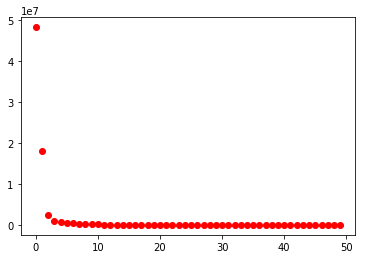

1085.9148


In [78]:
with tf.Session() as sess:
    values = {x:np.random.randn(N,D),
              w1:np.random.randn(D,H),
              w2:np.random.randn(H,D),
              y:np.random.randn(N,D)}
    learningRate = 1e-5
    steps = 50
    
    losses=[]
    
    for i in range(steps):
        out = sess.run([loss , grad_w1 , grad_w2] , feed_dict = values)
        lossVal , grad_w1Val , grad_w2Val = out
        
        
        vx1 = rho*vx1 + grad_w1Val
        values[w1] -= learningRate * vx1
        
        vx2 = rho*vx2 + grad_w2Val
        values[w2] -= learningRate * vx2
        
        
        losses.append(lossVal)
        
    
    plt.plot(range(steps), losses, 'ro', label='lossVal')
    plt.show()
    print(lossVal)
    
        
    
    
    

In [72]:
N,D,H = 64, 1000, 100

rho = 0.99
vx1 = 0
vx2 = 0

x = tf.placeholder(tf.float32, shape=(N,D))
y = tf.placeholder(tf.float32, shape=(N,D))
w1 = tf.Variable(tf.random_normal((D,H)))
w2 = tf.Variable(tf.random_normal((H,D)))


h = tf.maximum(tf.matmul(x,w1),0)
yPred = tf.matmul(h,w2)

diff = yPred - y
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))

grad_w1,grad_w2 = tf.gradients(loss , [w1,w2])

learningRate = 1e-5

vx1 = rho * vx1 + grad_w1
new_w1 = w1.assign(w1 - learningRate * vx1)

vx2 = rho * vx2 + grad_w2
new_w2 = w2.assign(w2 - learningRate * vx2)



updates = tf.group(new_w1 , new_w2, vx1 , vx2)


51252190.0
18021350.0
9499082.0
5625129.0
3575469.0
2386350.0
1648568.8
1169321.0
846663.5
623139.2
464597.0
350546.2
266941.38
204924.9
158460.73
123245.99
96403.22
75769.72
59850.227
47479.836
37840.348
30291.656
24336.184
19646.592
15937.392
12991.099
10641.542
8766.011
7264.6934
6059.74
5090.8657
4310.2827
3680.206
3170.8481
2758.6548
2424.5312
2152.1245
1931.5632
1752.5311
1606.929
1488.31
1391.5999
1312.6432
1248.1744
1195.4814
1152.403
1117.1733
1088.3545
1064.7717
1045.5171


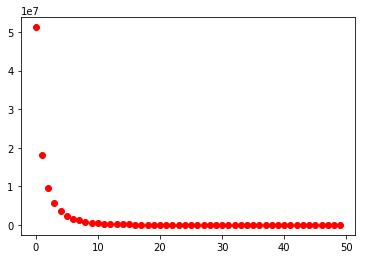

1045.5171


In [73]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    values = {x:np.random.randn(N,D) , y:np.random.randn(N,D)}
    
    steps = 50
    
    losses = []
    
    for i in range(steps):
        lossVal ,_ = sess.run([loss, updates],feed_dict=values)
        losses.append(lossVal)
        print(lossVal)
        
    
    plt.plot(range(steps), losses, 'ro', label='lossVal')
    plt.show()
    print(lossVal)
    
    


